# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
# Your code here

df = pd.read_csv('../data/boston_data.csv')
boston = df.copy()

In [41]:
boston.head()

crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.15876   0.0  10.81   0.0  0.413  5.961  17.5  5.2873  4.0  305.0   
1  0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320  8.0  284.0   
2  0.34940   0.0   9.90   0.0  0.544  5.972  76.7  3.1025  4.0  304.0   
3  2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257  5.0  403.0   
4  0.04337  21.0   5.64   0.0  0.439  6.115  63.0  6.8147  4.0  243.0   

   ptratio   black  lstat  medv  
0     19.2  376.94   9.88  21.7  
1     19.7  396.90   9.22  19.6  
2     18.4  396.24   9.97  20.3  
3     14.7  351.85  21.45  15.4  
4     16.8  393.97   9.43  20.5

In [42]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [43]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [44]:
boston.describe()

crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   
std      8.943922   22.053733    6.814909    0.254290    0.117321    0.67583   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.56100   
25%      0.082382    0.000000    5.190000    0.000000    0.453000    5.90275   
50%      0.253715    0.000000    9.795000    0.000000    0.538000    6.23050   
75%      4.053158   12.500000   18.100000    0.000000    0.631000    6.62925   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.78000   

              age         dis         rad         tax     ptratio       black  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601733    3.799666    9.836634  411.688119   18.444554  355.068243   
std     28.066143    2.109916    8.834741  171.073553    2.150295   94.489572   
min      2.900000    1.169100    1.000000  187.000000   12.600000    0.320000   
25%     45.800000    2.087875    4.000000  281.000000   17.375000  374.710000   
50%     76.600000    3.207450    5.000000  330.000000   19.000000  391.065000   
75%     94.150000    5.222125   24.000000  666.000000   20.200000  396.007500   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  404.000000  404.000000  
mean    12.598936   22.312376  
std      6.925173    8.837019  
min      1.730000    5.000000  
25%      7.135000   17.100000  
50%     11.265000   21.400000  
75%     16.910000   25.000000  
max     34.370000   50.000000

In [45]:
z = np.abs(stats.zscore(boston))
boston = boston[(z < 3).all(axis=1)]

In [46]:
np.where(z>3)

(array([  9,  14,  20,  28,  29,  34,  36,  37,  38,  47,  53,  56,  57,
         62,  67,  70,  71,  71,  79,  88,  89,  91,  98, 101, 106, 111,
        111, 112, 114, 116, 136, 141, 148, 148, 150, 158, 160, 160, 161,
        165, 166, 170, 170, 177, 184, 192, 196, 198, 200, 200, 202, 205,
        212, 214, 218, 223, 226, 232, 234, 238, 241, 246, 250, 251, 251,
        252, 252, 254, 258, 258, 264, 272, 272, 272, 273, 273, 285, 285,
        297, 303, 304, 312, 314, 314, 321, 333, 337, 341, 347, 352, 355,
        369, 380, 382, 382, 400, 400, 401, 401, 401, 402], dtype=int64),
 array([ 3, 11, 11,  1,  7,  0, 13,  3, 11,  3,  1,  3,  1, 11,  3,  1,  3,
        13,  3, 13,  5, 11,  3,  1,  1,  1,  7,  1,  0,  0,  3, 11,  3,  5,
         3,  3,  1, 13,  7,  3,  3, 11, 12,  5, 11,  1, 11,  3,  5, 13,  3,
         3,  1, 11,  3, 11, 13,  1,  5,  3, 11, 11,  3,  1,  7,  1,  7,  3,
        11, 12,  3,  3,  5, 13,  0, 11,  0, 11,  3,  5, 11, 11,  1, 13,  1,
        11,  1,  3, 13, 13, 11,  3, 

In [47]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     321 non-null    float64
 1   zn       321 non-null    float64
 2   indus    321 non-null    float64
 3   chas     321 non-null    float64
 4   nox      321 non-null    float64
 5   rm       321 non-null    float64
 6   age      321 non-null    float64
 7   dis      321 non-null    float64
 8   rad      321 non-null    float64
 9   tax      321 non-null    float64
 10  ptratio  321 non-null    float64
 11  black    321 non-null    float64
 12  lstat    321 non-null    float64
 13  medv     321 non-null    float64
dtypes: float64(14)
memory usage: 37.6 KB


In [48]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [49]:
boston.describe()

crim          zn       indus   chas         nox          rm  \
count  321.000000  321.000000  321.000000  321.0  321.000000  321.000000   
mean     2.527761    7.370717   11.034611    0.0    0.550987    6.258252   
std      4.736615   15.396264    6.681523    0.0    0.110912    0.566576   
min      0.006320    0.000000    1.250000    0.0    0.400000    4.368000   
25%      0.083080    0.000000    5.320000    0.0    0.453000    5.891000   
50%      0.214090    0.000000    8.560000    0.0    0.532000    6.223000   
75%      2.449530    0.000000   18.100000    0.0    0.614000    6.556000   
max     25.940600   75.000000   27.740000    0.0    0.871000    8.266000   

              age         dis         rad         tax     ptratio       black  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean    68.159813    3.800378    9.121495  398.532710   18.547664  373.198941   
std     27.889502    1.898933    8.411722  165.988346    2.041645   55.710630   
min      2.900000    1.316300    1.000000  188.000000   13.000000   81.330000   
25%     46.700000    2.200400    4.000000  281.000000   17.400000  378.250000   
50%     74.400000    3.360300    5.000000  311.000000   19.100000  392.530000   
75%     94.300000    5.287300    8.000000  469.000000   20.200000  396.900000   
max    100.000000    9.222900   24.000000  711.000000   21.200000  396.900000   

            lstat        medv  
count  321.000000  321.000000  
mean    12.558193   21.783489  
std      6.483750    7.122202  
min      1.980000    5.600000  
25%      7.510000   17.800000  
50%     11.320000   21.200000  
75%     16.350000   24.600000  
max     30.810000   48.300000

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

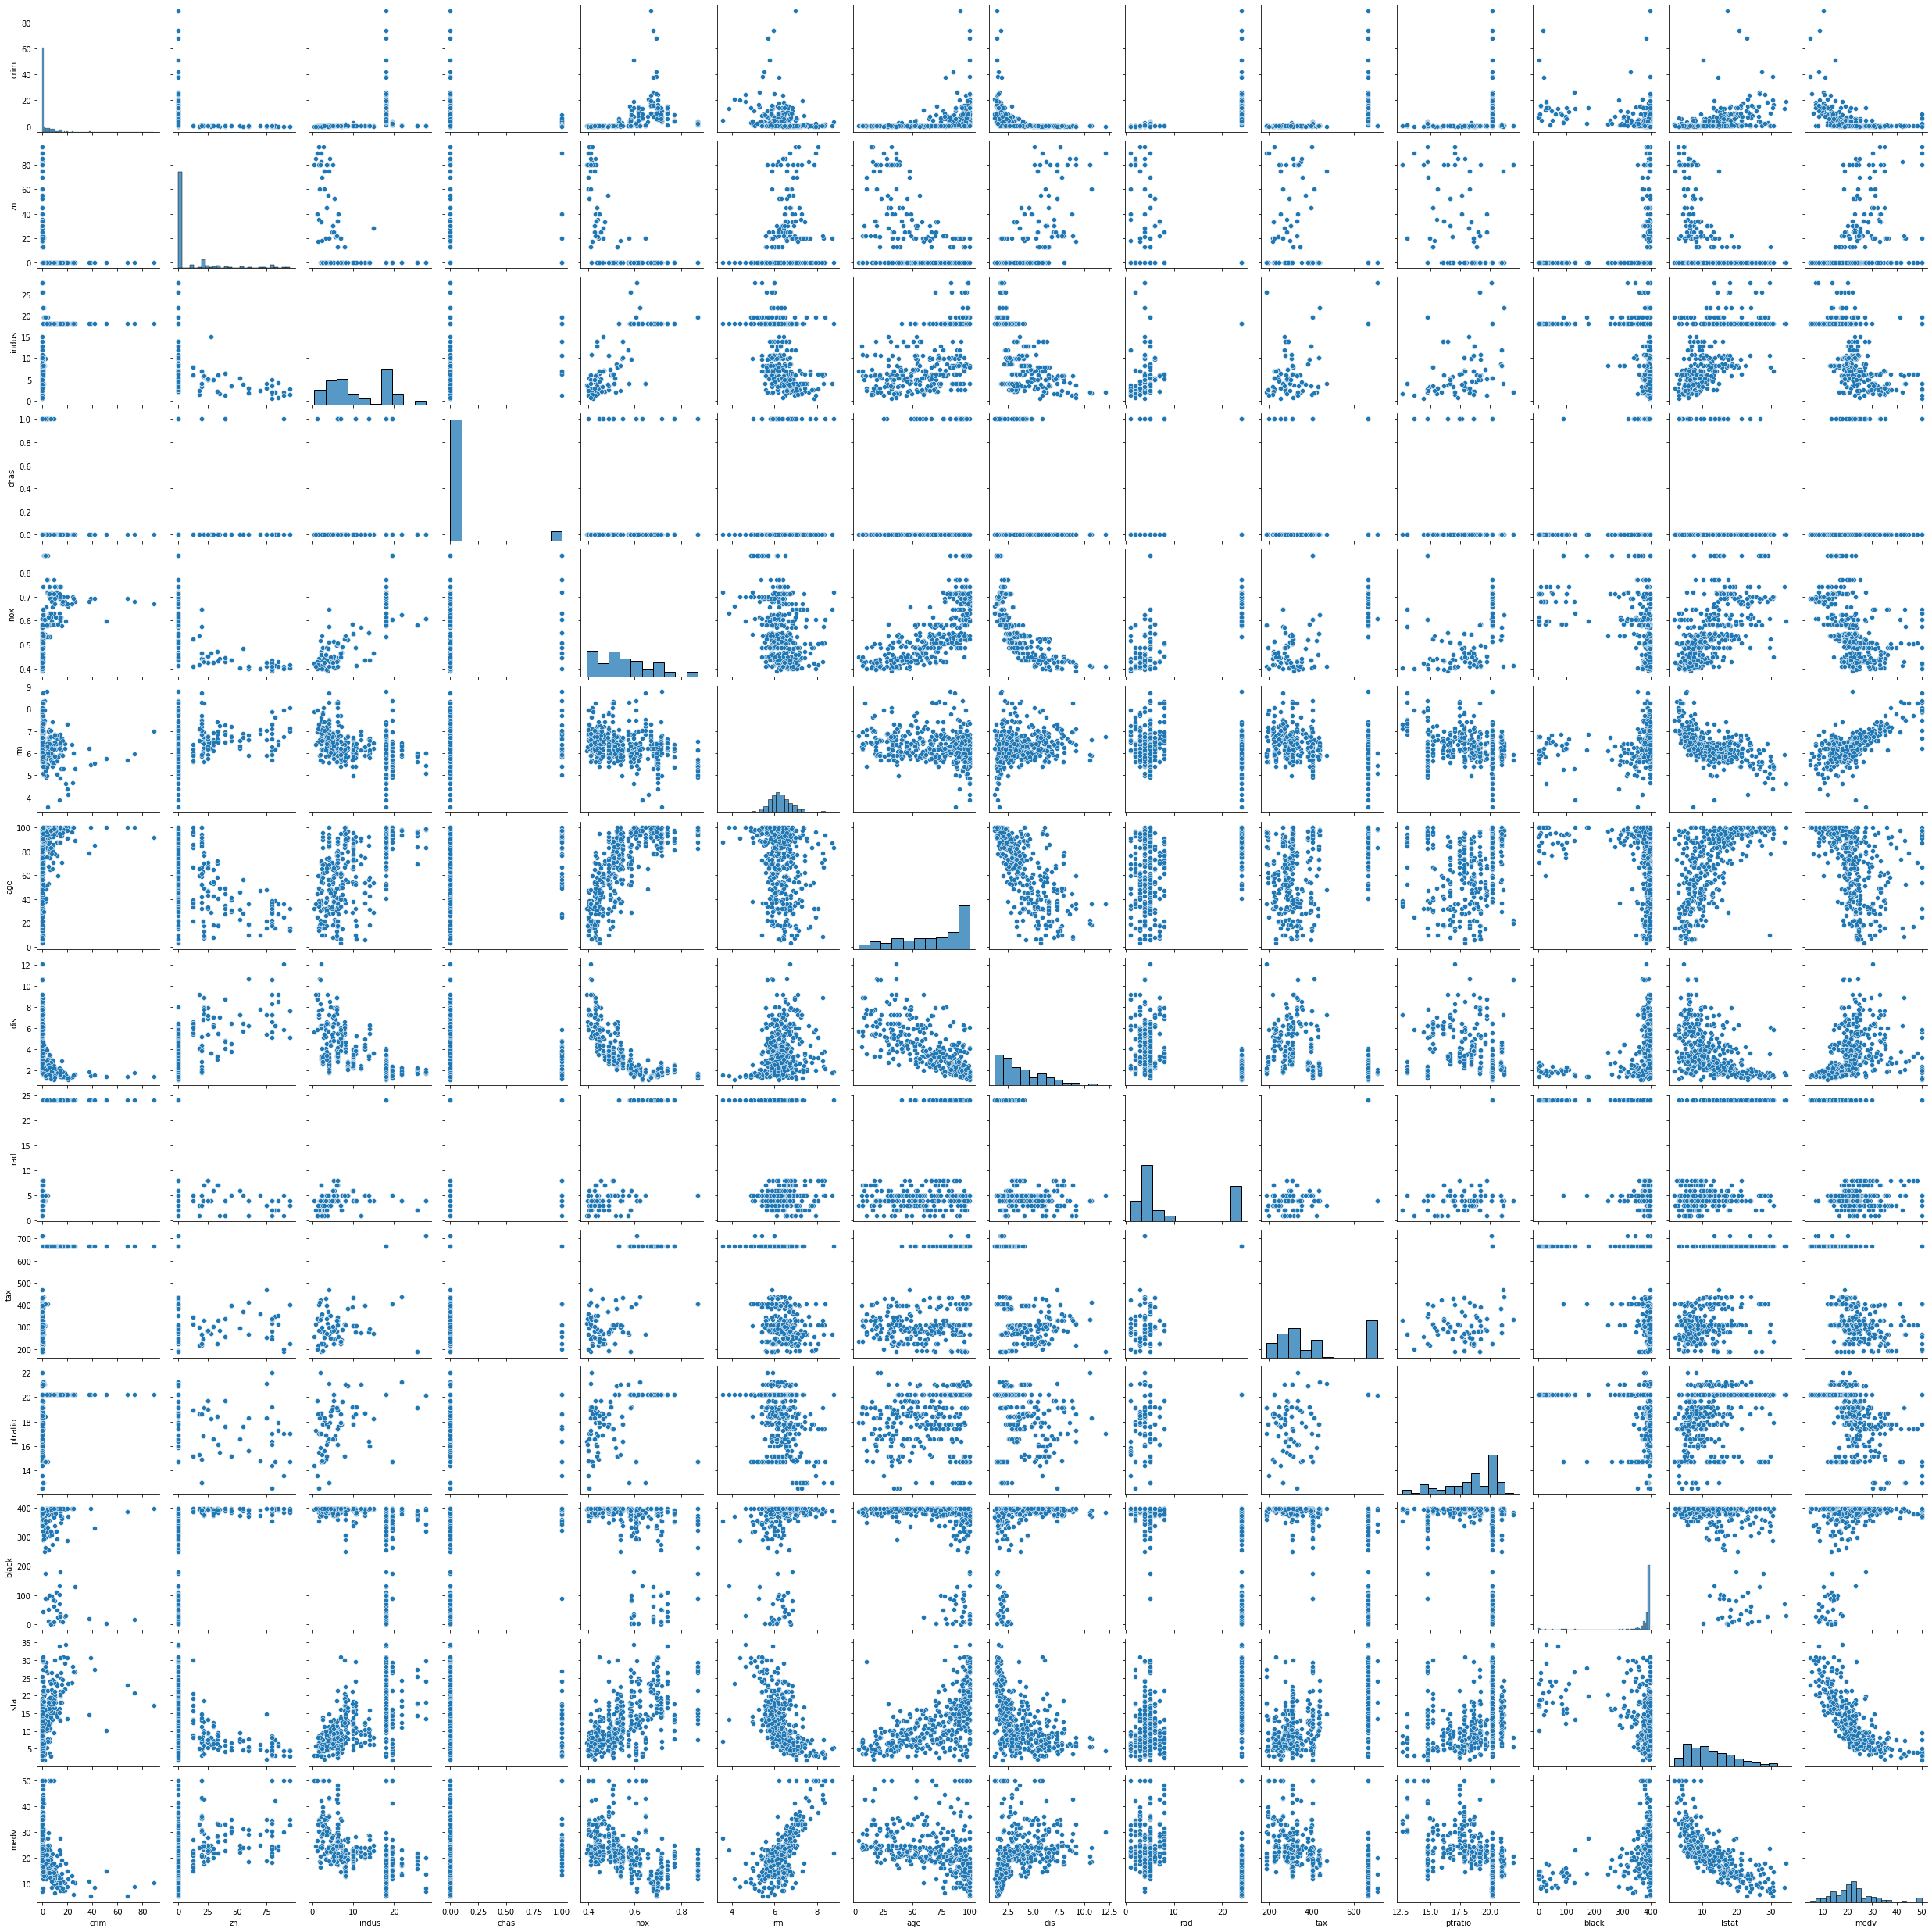

In [11]:
# Before cleaning
sns.pairplot(boston)
plt.show()

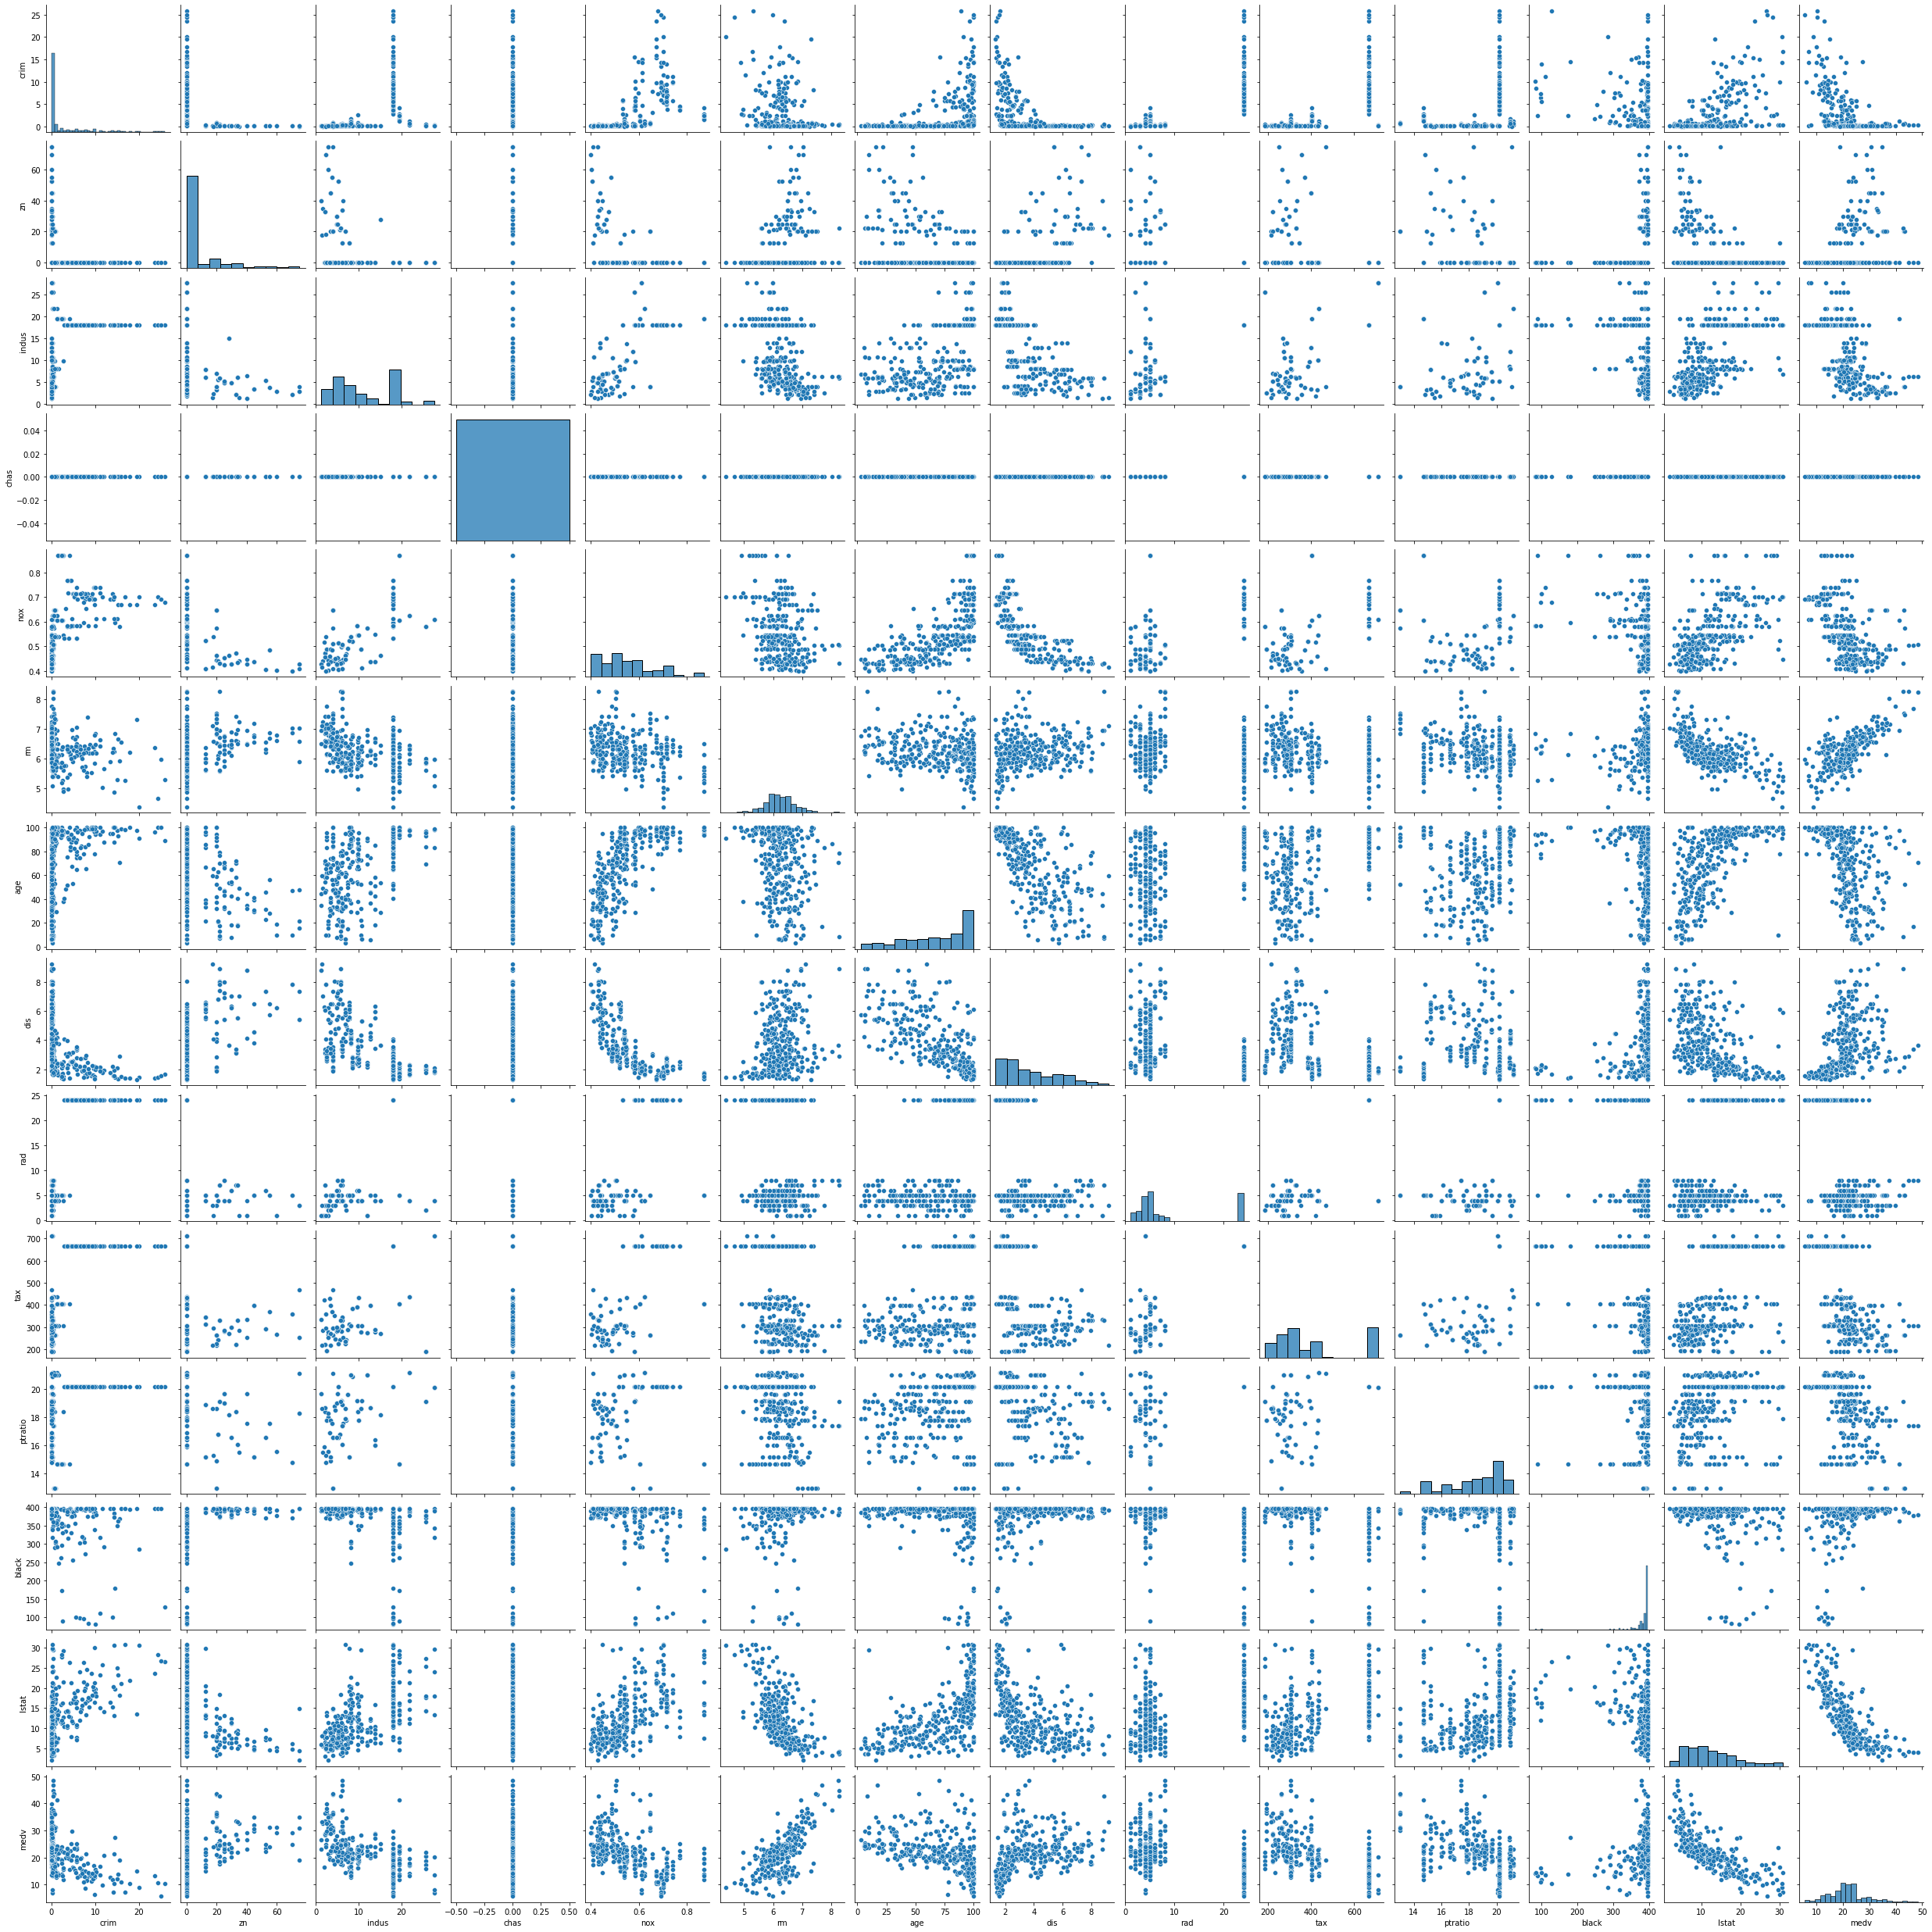

In [13]:
# After cleaning

sns.pairplot(boston)
plt.show()


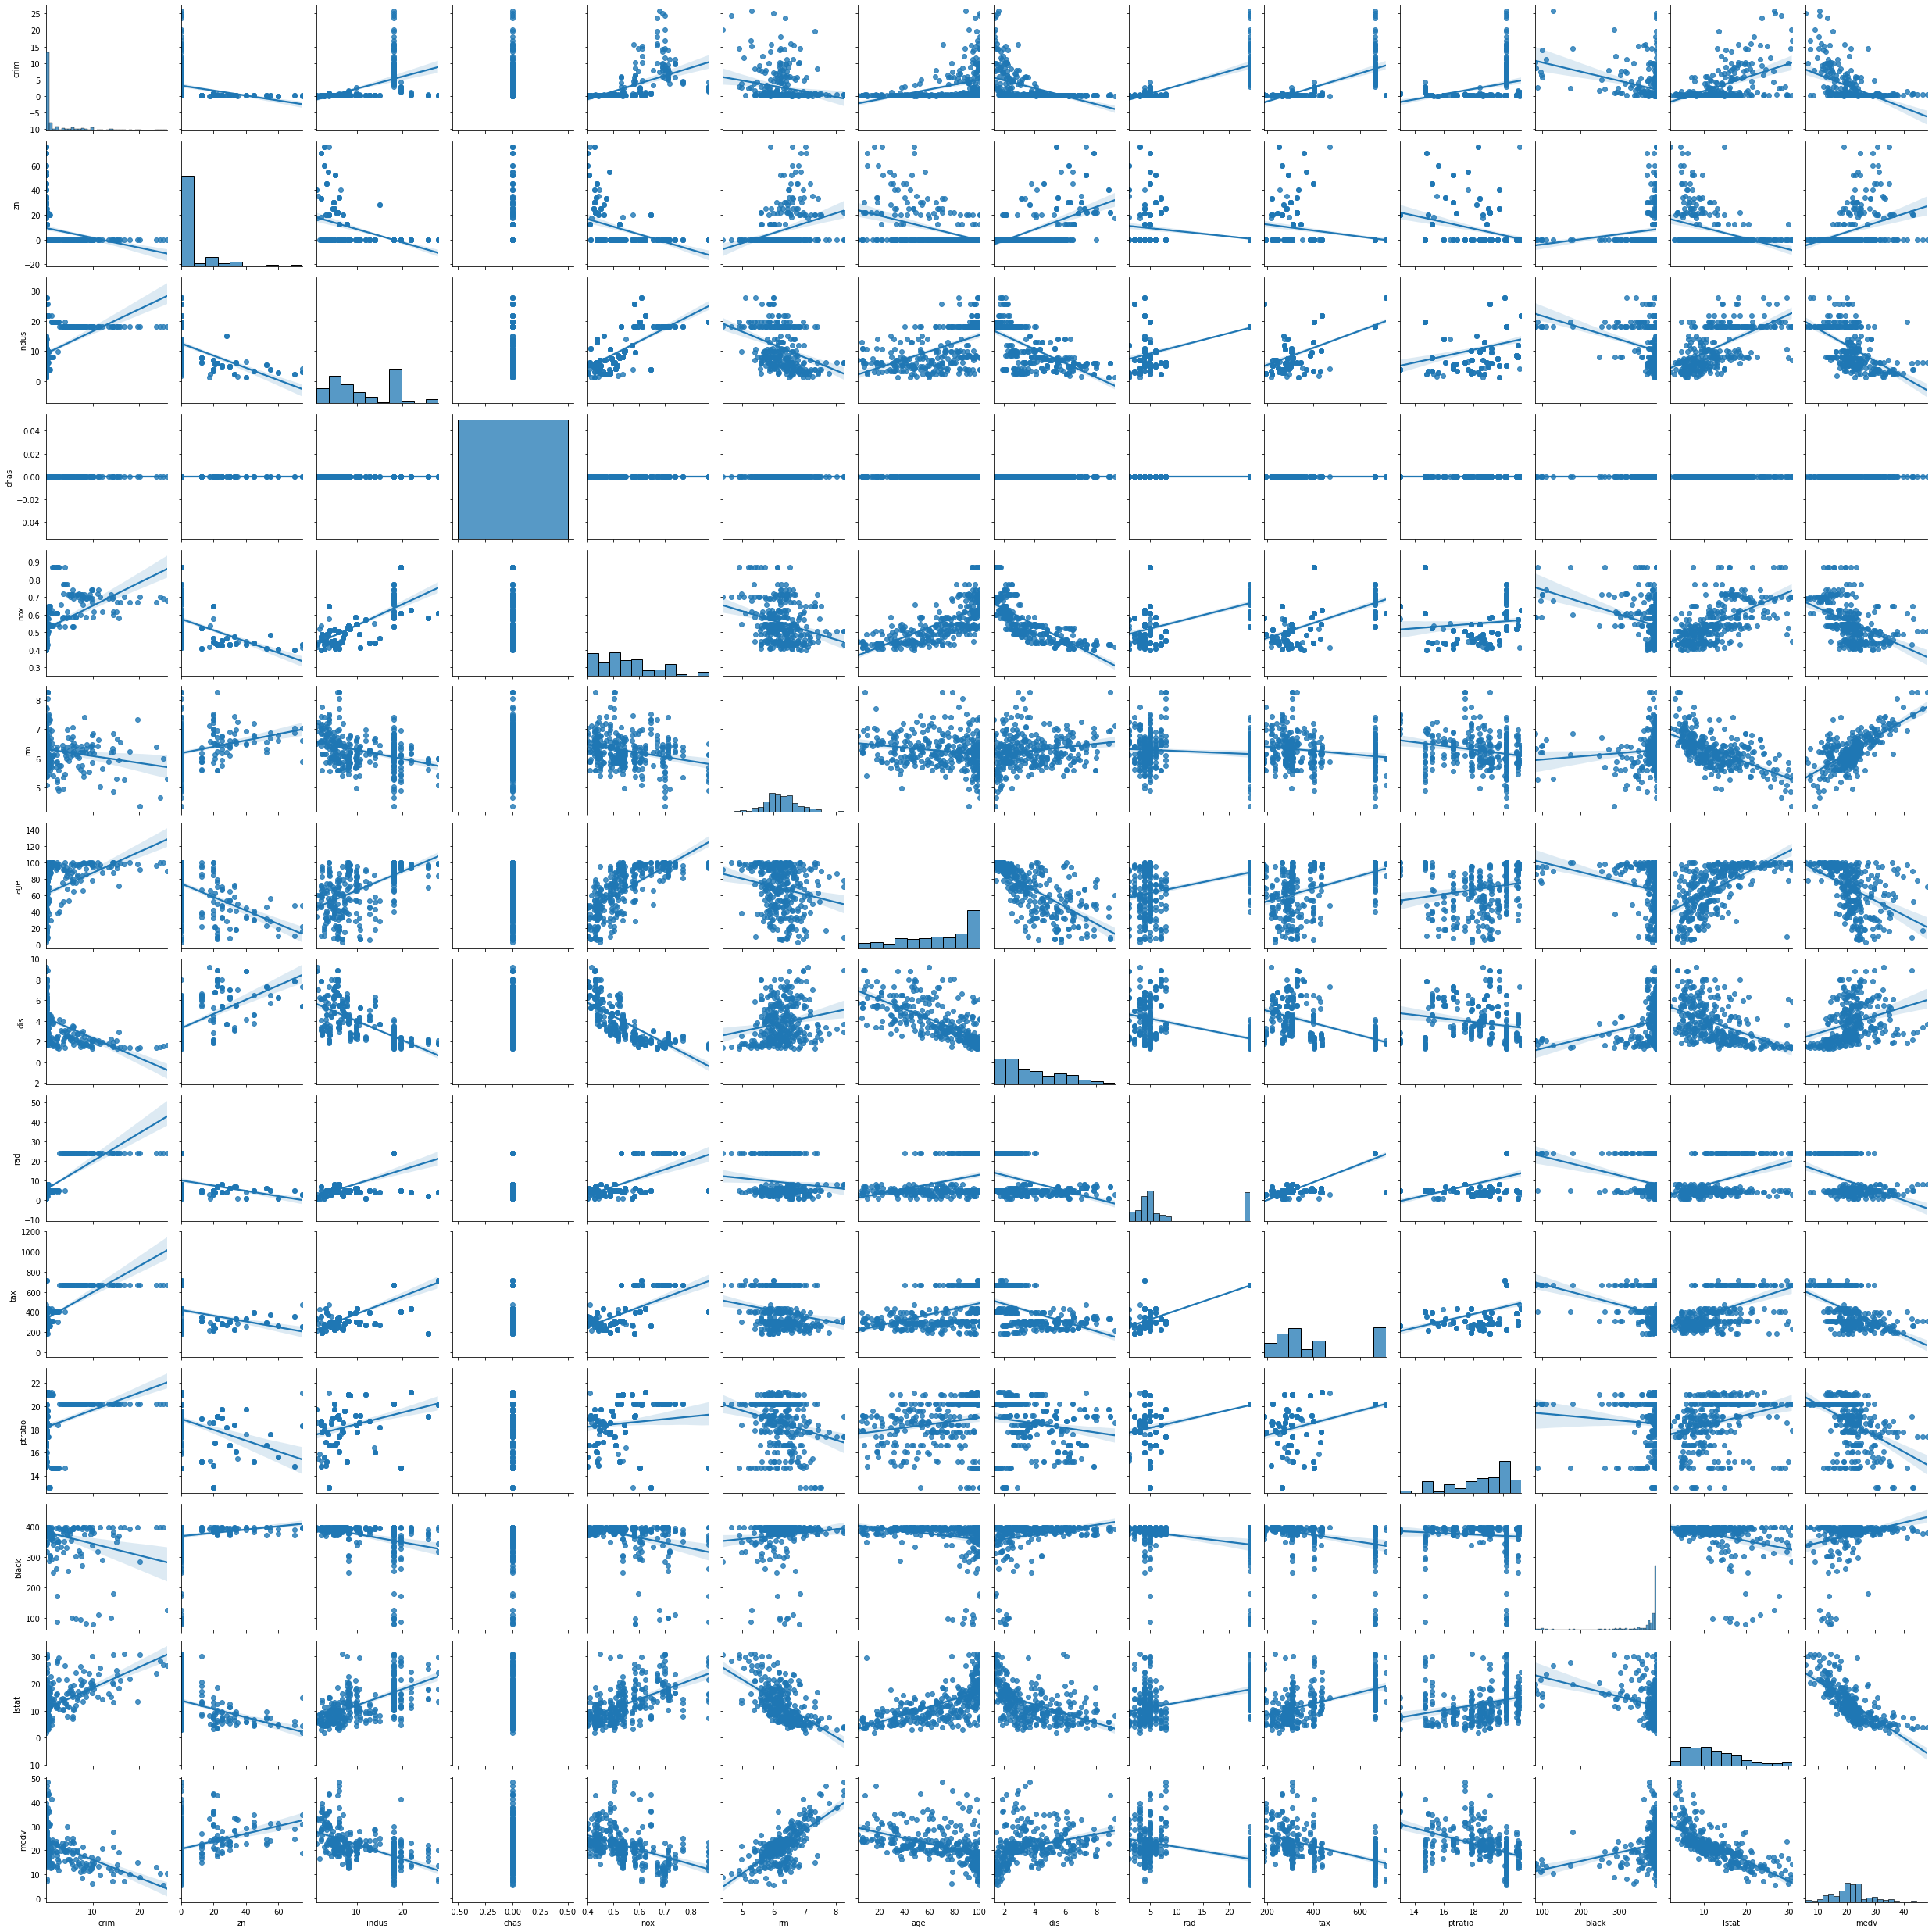

In [20]:
# Inspect regression before droping variables

sns.pairplot(boston, kind='reg')
plt.show()

In [33]:
# Which variables have the highest correlation with price?

x = boston.drop('medv', axis=1)
y = boston['medv']

print("Absolute correlation between all the variables and price:")

abs( x.corrwith( y ) ).sort_values( ascending=False )


Absolute correlation between all the variables and price:


lstat      0.754075
rm         0.712762
indus      0.565210
tax        0.535400
crim       0.504009
ptratio    0.471788
nox        0.467456
age        0.454210
rad        0.425741
zn         0.342641
dis        0.314168
black      0.282290
chas            NaN
dtype: float64

In [50]:
# Droping variables based on threshold -> all correlation lower than +- .40

boston_cleaned = boston.drop(['chas', 'black', 'dis', 'zn'], axis=1)

boston_cleaned.head()

crim  indus    nox     rm   age  rad    tax  ptratio  lstat  medv
0  0.15876  10.81  0.413  5.961  17.5  4.0  305.0     19.2   9.88  21.7
1  0.10328   5.13  0.453  5.927  47.2  8.0  284.0     19.7   9.22  19.6
2  0.34940   9.90  0.544  5.972  76.7  4.0  304.0     18.4   9.97  20.3
3  2.73397  19.58  0.871  5.597  94.9  5.0  403.0     14.7  21.45  15.4
4  0.04337   5.64  0.439  6.115  63.0  4.0  243.0     16.8   9.43  20.5

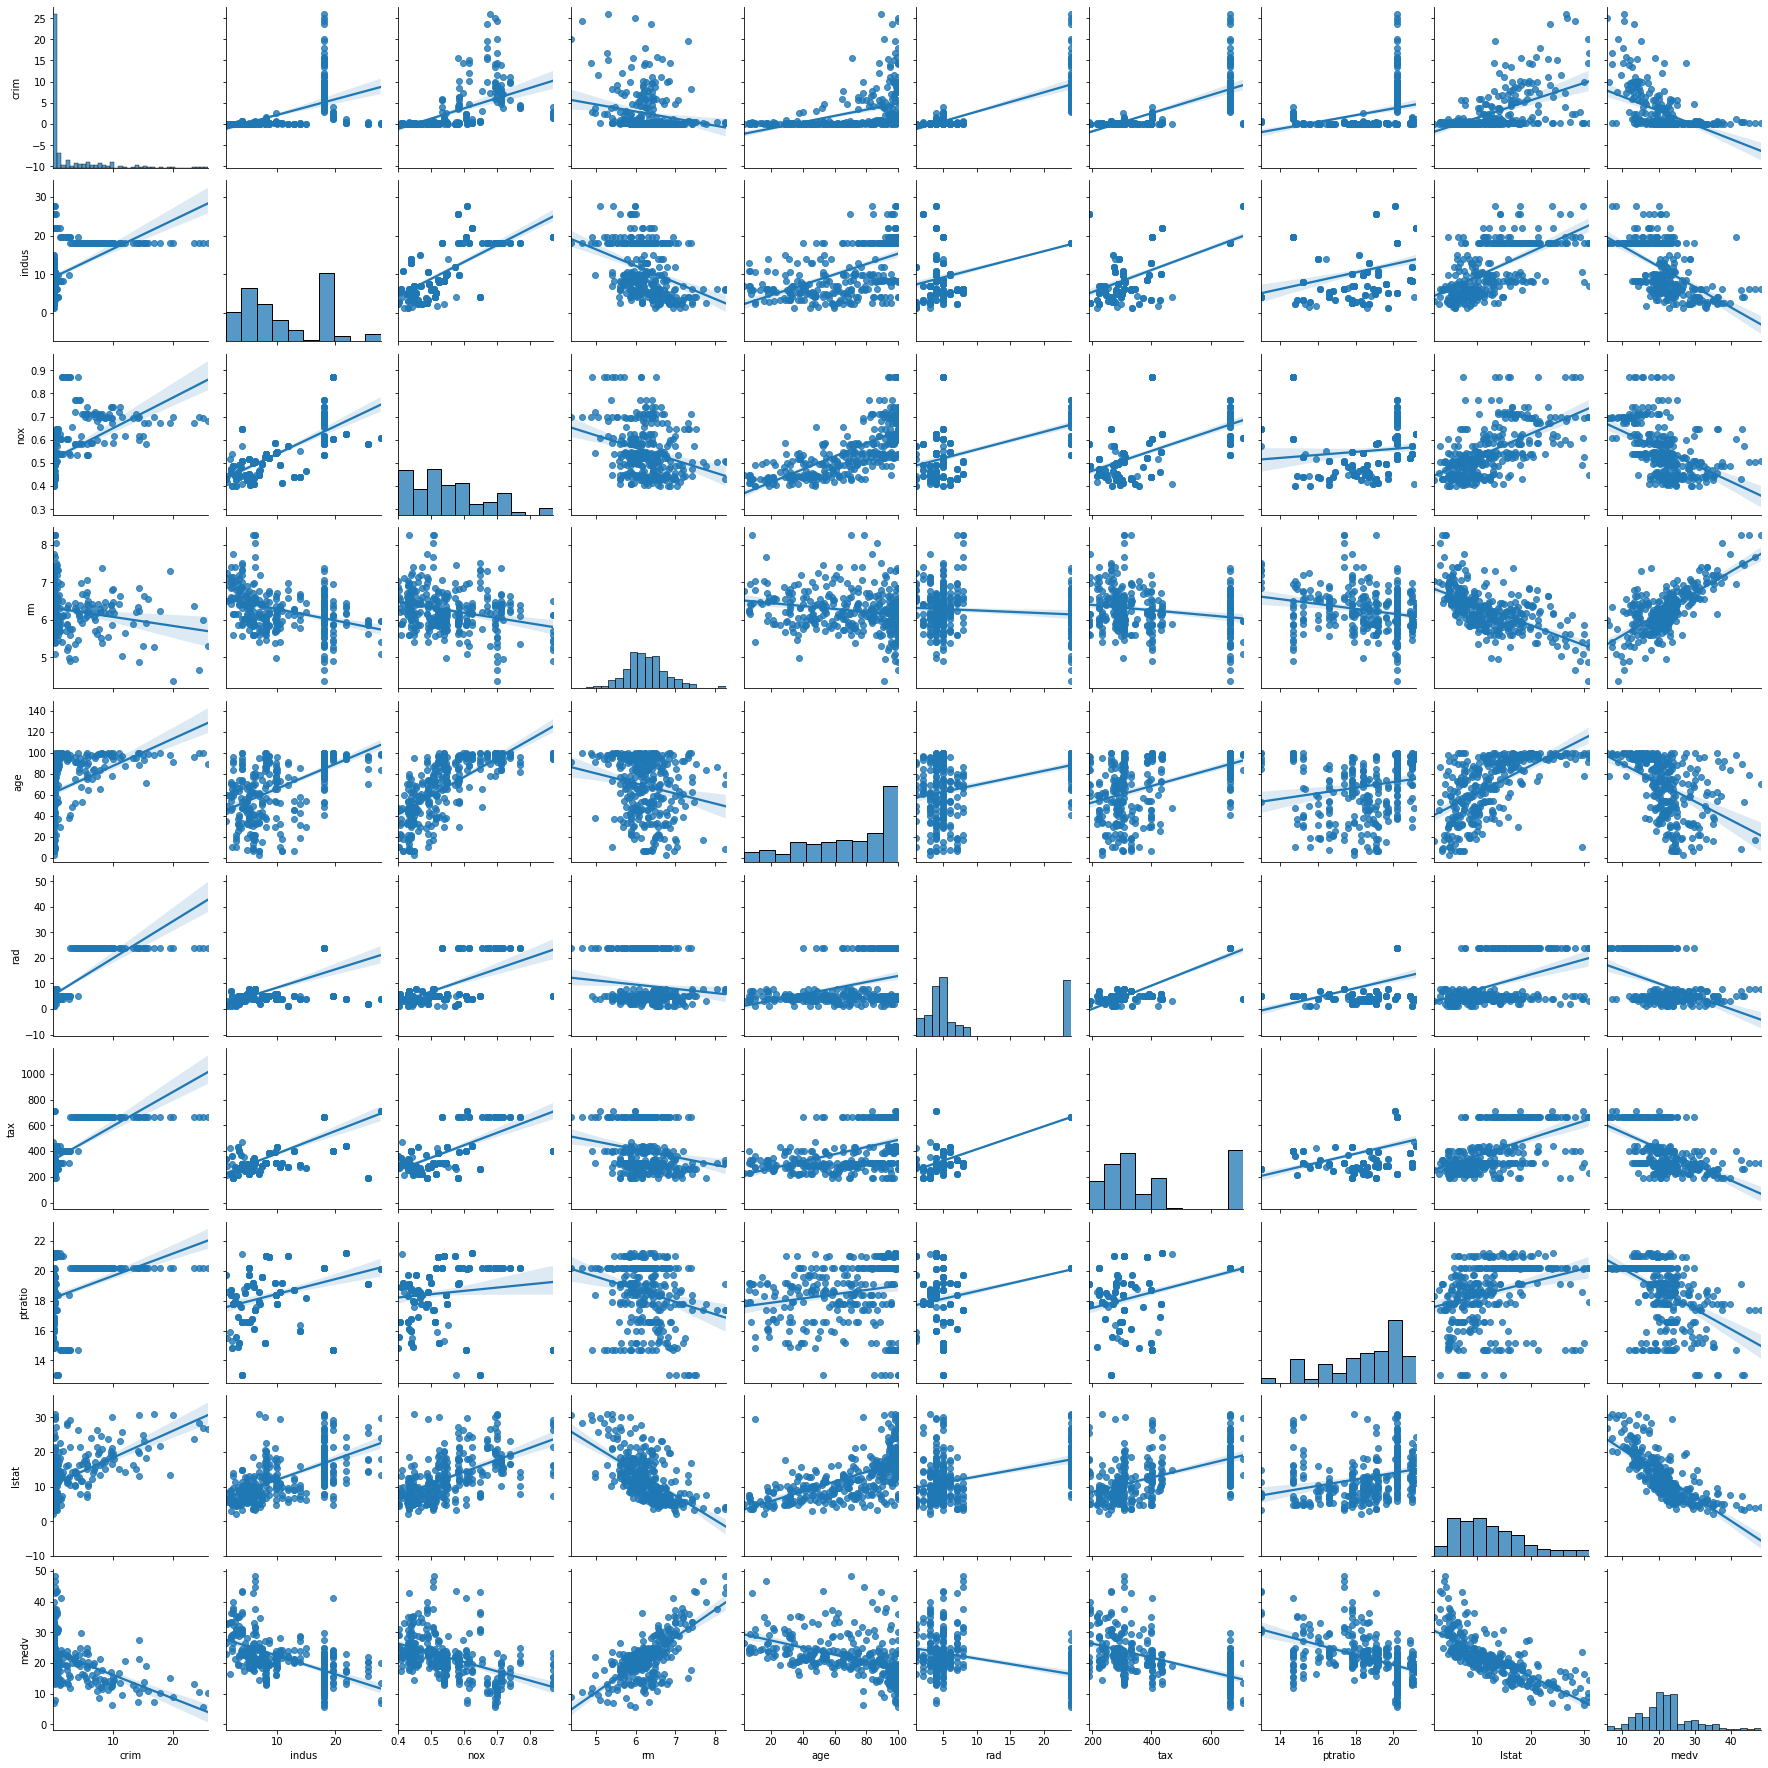

In [51]:
# Inspec regression after droping variables

sns.pairplot(boston_cleaned, kind='reg')
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# Your response here

# It's interesting to see that the direction of correlation between all the variables and price is in one direction, but 
# the direction of correlation between all the variables without price is in the opposite direction. 
# The variance between price <-> lstat and price <-> rm is low, for the rest is huge.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [65]:
# Your response here

boston_dropped_variables = boston[['chas', 'black', 'dis', 'zn', 'medv']]
boston_dropped_variables.head()

chas   black     dis    zn  medv
0   0.0  376.94  5.2873   0.0  21.7
1   0.0  396.90  6.9320  25.0  19.6
2   0.0  396.24  3.1025   0.0  20.3
3   0.0  351.85  1.5257   0.0  15.4
4   0.0  393.97  6.8147  21.0  20.5

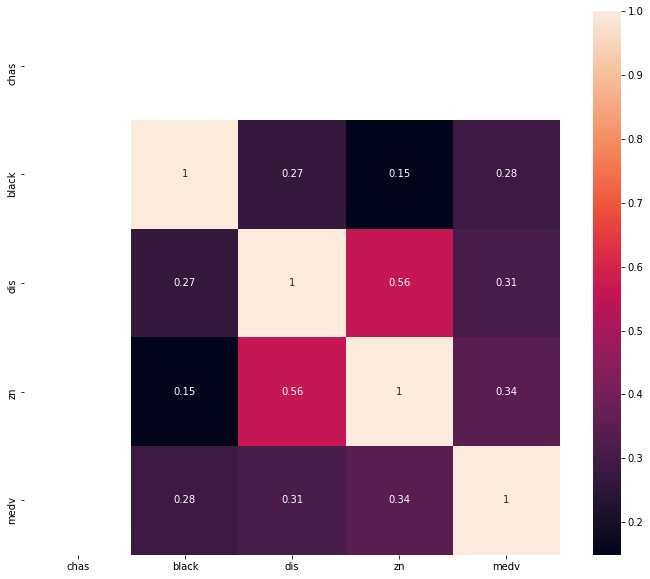

In [166]:
fig = plt.subplots(figsize=(12,10))

correlation_matrix = boston_dropped_variables.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.show()

In [ ]:
# No, the correlation between the rest variables and price are low, also the collinearity between them is low. 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [67]:
# Your code here

boston['medv'].describe()


count    321.000000
mean      21.783489
std        7.122202
min        5.600000
25%       17.800000
50%       21.200000
75%       24.600000
max       48.300000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [71]:
from sklearn.metrics import r2_score, mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    MSE = mean_squared_error(y_true, y_predict)
    R2 = r2_score(y_true, y_predict)
    return R2, MSE

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [ ]:
X = boston_cleaned.drop('medv', axis=1)
y = boston_cleaned['medv']


In [74]:
# Your code here
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [118]:
from sklearn.ensemble import RandomForestRegressor

# Your code here

train_r2_mse_score = []
test_r2_mse_score = []





In [119]:
# Adjust model depth to 2, 4, 6, 8, 10. 
for depth in range(2, 12, 2):
    forest_model = RandomForestRegressor(max_depth=depth)
    
    
    # train the model
    forest_model.fit(X_train, y_train)
    
    # predict value
    y_train_predict = forest_model.predict(X_train)
    y_test_predict = forest_model.predict(X_test)
    
    # evaluation
    train_r2_mse_score.append(performance_metric(y_train, y_train_predict))
    test_r2_mse_score.append(performance_metric(y_test, y_test_predict))
    




In [120]:
train_performance = pd.DataFrame(train_r2_mse_score, columns=['R2_SCORE', "MSE"])
train_performance['K'] = [2, 4, 6, 8, 10]
train_performance = train_performance[['K', 'R2_SCORE', 'MSE']]

In [121]:
print('Train set performance:')
train_performance

Train set performance:


K  R2_SCORE        MSE
0   2  0.799998  10.131576
1   4  0.912249   4.445211
2   6  0.952608   2.400765
3   8  0.966595   1.692228
4  10  0.973023   1.366592

In [122]:
test_performance = pd.DataFrame(test_r2_mse_score, columns=['R2_SCORE', "MSE"])
test_performance['K'] = [2, 4, 6, 8, 10]
test_performance = test_performance[['K', 'R2_SCORE', 'MSE']]

In [123]:
print('Test set performance:')
test_performance

Test set performance:


K  R2_SCORE        MSE
0   2  0.657005  17.224991
1   4  0.722035  13.959183
2   6  0.771985  11.450745
3   8  0.778565  11.120287
4  10  0.783543  10.870319

Now, plot the score for each tree on the training set and on the testing set.

In [149]:
train_r2_mse_score

[(0.7999979454535253, 10.131576161234591),
 (0.9122494587787442, 4.445210793402718),
 (0.9526077742838982, 2.400765059048585),
 (0.9665946345556905, 1.6922276371628504),
 (0.9730228429808655, 1.3665915661353054)]

In [151]:
r2_train = []

for r2 in range(len(train_r2_mse_score)):
    r2_train.append(train_r2_mse_score[r2][0])

In [152]:
r2_train

[0.7999979454535253,
 0.9122494587787442,
 0.9526077742838982,
 0.9665946345556905,
 0.9730228429808655]

In [153]:
test_r2_mse_score

[(0.6570045469058108, 17.224991175944176),
 (0.7220354929902288, 13.959182657602685),
 (0.7719851715670494, 11.450744819825536),
 (0.77856547064393, 11.120286813715417),
 (0.7835429860256287, 10.870319481045437)]

In [156]:
r2_test = []

for r2 in range(len(test_r2_mse_score)):
    r2_test.append(test_r2_mse_score[r2][0])

In [157]:
r2_test

[0.6570045469058108,
 0.7220354929902288,
 0.7719851715670494,
 0.77856547064393,
 0.7835429860256287]

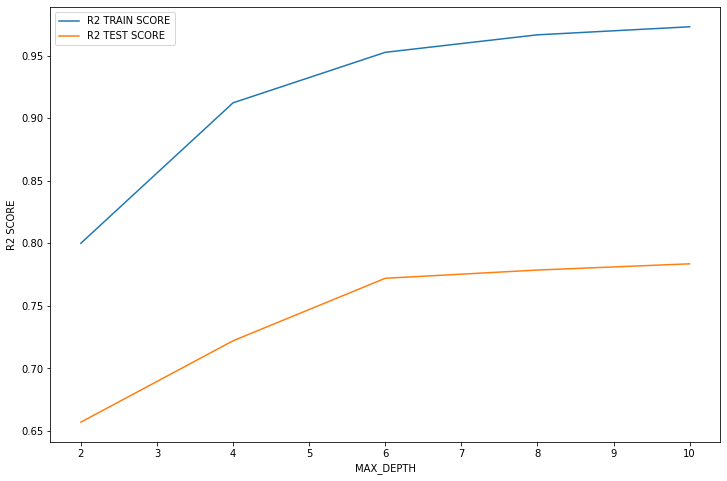

In [186]:
depths = [2, 4, 6, 8, 10]

fig, ax = plt.subplots(figsize=(12,8))

plt.plot(depths, r2_train, label="R2 TRAIN SCORE")
plt.plot(depths, r2_test, label="R2 TEST SCORE")
ax.set(xlabel='MAX_DEPTH', ylabel='R2 SCORE')
plt.legend()

plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

# The more depth the better performance, but until it reaches 6 depth

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [187]:
train_r2_mse_score = []
test_r2_mse_score = []

In [188]:
# Your code here

# Adjust model depth to 1 and 10. 
for depth in range(1, 11, 9):
    forest_model = RandomForestRegressor(max_depth=depth)
    
    
    # train the model
    forest_model.fit(X_train, y_train)
    
    # predict value
    y_train_predict = forest_model.predict(X_train)
    y_test_predict = forest_model.predict(X_test)
    
    # evaluation
    train_r2_mse_score.append(performance_metric(y_train, y_train_predict))
    test_r2_mse_score.append(performance_metric(y_test, y_test_predict))
    




In [189]:
train_performance = pd.DataFrame(train_r2_mse_score, columns=['R2_SCORE', "MSE"])
train_performance['K'] = [1, 10]
train_performance = train_performance[['K', 'R2_SCORE', 'MSE']]

In [190]:
print('Train set performance:')
train_performance

Train set performance:


K  R2_SCORE        MSE
0   1  0.601295  20.197331
1  10  0.972249   1.405797

In [192]:
test_performance = pd.DataFrame(test_r2_mse_score, columns=['R2_SCORE', "MSE"])
test_performance['K'] = [1, 10]
test_performance = test_performance[['K', 'R2_SCORE', 'MSE']]

In [193]:
print('Test set performance:')
test_performance

Test set performance:


K  R2_SCORE        MSE
0   1  0.414543  29.401251
1  10  0.786260  10.733873

In [ ]:
# Your response here
# With max_depth = 1 we clearly can see underfitting (high bias)
# With max_dept = 10 we clearly can see overfitting (high variance)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

# I guess the optimal value is betwwen [5,7]

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here

# The data is quite old. The market have changed since then, not mention 'covid' situation.
# For 1978 somehow they look sufficient.
# Not much, because for most of them correlation is between +- .40 and +- .56, we need more variables with atleas r = +- 0.70.
# Not at all.